In [87]:
import pandas as pd
import numpy as np
import time

In [88]:
#read in the list of videos contained in the csv
df = pd.read_csv('vidz.csv')

In [89]:
ca = pd.read_csv('22.31.10_CA_videos.csv')
de = pd.read_csv('22.31.10_DE_videos.csv')
fr = pd.read_csv('22.31.10_FR_videos.csv')
gb = pd.read_csv('22.31.10_GB_videos.csv')
ind = pd.read_csv('22.31.10_IN_videos.csv')
jp = pd.read_csv('22.31.10_JP_videos.csv')
kr = pd.read_csv('22.31.10_KR_videos.csv')
mx = pd.read_csv('22.31.10_MX_videos.csv')
ru = pd.read_csv('22.31.10_RU_videos.csv')
us = pd.read_csv('22.31.10_US_videos.csv')


In [90]:
ru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           179 non-null    object
 1   title              179 non-null    object
 2   publishedAt        179 non-null    object
 3   channelTitle       179 non-null    object
 4   categoryId         179 non-null    int64 
 5   trending_date      179 non-null    object
 6   tags               179 non-null    object
 7   view_count         179 non-null    int64 
 8   likes              179 non-null    int64 
 9   comment_count      179 non-null    int64 
 10  thumbnail_link     179 non-null    object
 11  comments_disabled  179 non-null    bool  
 12  ratings_disabled   179 non-null    bool  
 13  description        165 non-null    object
 14  duration           179 non-null    object
 15  captions           179 non-null    bool  
dtypes: bool(3), int64(4), object(9)
memory usage

In [91]:
df = pd.concat([ca, de, fr, gb, ind, jp, kr, mx, ru, us])

In [92]:
df['rank'] = df.index + 1

In [144]:
df[df.duplicated(['video_id'], keep=False) == True].sort_values(by='rank').drop_duplicates(['video_id'], inplace=True)

In [94]:
#drop columns with redundant information
df = df.drop(columns=['comments_disabled', 'ratings_disabled' ,'thumbnail_link'])

In [95]:
df.categoryId = df.categoryId.astype('object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 199
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       1229 non-null   object
 1   title          1229 non-null   object
 2   publishedAt    1229 non-null   object
 3   channelTitle   1229 non-null   object
 4   categoryId     1229 non-null   object
 5   trending_date  1229 non-null   object
 6   tags           1229 non-null   object
 7   view_count     1229 non-null   object
 8   likes          1229 non-null   object
 9   comment_count  1229 non-null   object
 10  description    1211 non-null   object
 11  duration       1229 non-null   object
 12  captions       1229 non-null   object
 13  rank           1229 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 144.0+ KB


## Convert to datetime --> ppublised at, trending date, duration (timedelta)

In [97]:
#convert publishedAT to datetime column
df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
df.publishedAt

0     2022-10-30 21:31:19+00:00
1     2022-10-30 17:00:21+00:00
2     2022-10-31 06:10:01+00:00
3     2022-10-30 17:59:03+00:00
4     2022-10-30 21:30:06+00:00
                 ...           
195   2022-10-25 19:00:32+00:00
196   2022-10-26 05:00:33+00:00
197   2022-10-23 20:00:40+00:00
198   2022-10-25 22:53:41+00:00
199   2022-10-25 17:36:29+00:00
Name: publishedAt, Length: 1229, dtype: datetime64[ns, UTC]

In [266]:
#set date to next day in order to capture videos released at different times in different time zones
df.trending_date = '22.31.10'

In [267]:
#convert trending to datetime column --
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
df.trending_date

0     2022-10-31 00:00:00+00:00
1     2022-10-31 00:00:00+00:00
2     2022-10-31 00:00:00+00:00
3     2022-10-31 00:00:00+00:00
4     2022-10-31 00:00:00+00:00
                 ...           
195   2022-10-31 00:00:00+00:00
196   2022-10-31 00:00:00+00:00
197   2022-10-31 00:00:00+00:00
198   2022-10-31 00:00:00+00:00
199   2022-10-31 00:00:00+00:00
Name: trending_date, Length: 1229, dtype: datetime64[ns, UTC]

In [100]:
#import tzinfo inorder to strip time zone information from published at. 
#this makes it a "naive" datetime object. may want to change this approach
# from datetime import tzinfo

# df.loc[1,'publishedAt'].replace(tzinfo=None)
#strips the timezone from each row
# for n in range(0,200):
#     df.loc[n,'publishedAt']= df.loc[n,'publishedAt'].replace(tzinfo=None)
# df.loc[10, ['publishedAt']]

In [272]:
#create age column. may want to give timezone info to trending date instead of removing it from pblishedAt
df['age']=(df.trending_date - df.publishedAt)

In [273]:
df.age.sort_values().head(10)

13   -1 days +11:59:20
52   -1 days +12:59:28
31   -1 days +12:59:35
17   -1 days +12:59:44
49   -1 days +12:59:58
10   -1 days +13:14:05
3    -1 days +13:39:53
22   -1 days +13:59:24
7    -1 days +14:17:13
33   -1 days +14:17:30
Name: age, dtype: timedelta64[ns]

In [274]:
df.age.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,2,28,41,0,0,0
1,0,6,59,39,0,0,0
2,-1,17,49,59,0,0,0
3,0,6,0,57,0,0,0
4,0,2,29,54,0,0,0
...,...,...,...,...,...,...,...
195,5,4,59,28,0,0,0
196,4,18,59,27,0,0,0
197,7,3,59,20,0,0,0
198,5,1,6,19,0,0,0


In [271]:
#converts the age category timedelta into hours .. so the videos are x hours old now 
df.age = (df.age.dt.days * 24) + (df.age.dt.seconds/3600)

convert age timedelta to hours
https://pandas.pydata.org/docs/user_guide/timedeltas.html#frequency-conversion

## View:Like ratio that can score the video | view:comment ratio

Have them all as a weighted ratio

df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [103]:
#creates engagement metric. not sure how to do weightd columns really
#df['engagement'] = (df.view_count - df.likes) + (df.likes * 2) + (df.comment_count * 4) 
df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [104]:
df.engagement

0       0.02004
1      0.057231
2      0.166547
3      0.001366
4      0.072784
         ...   
195    0.089409
196    0.117895
197    0.067428
198    0.064092
199    0.027896
Name: engagement, Length: 1229, dtype: object

## Is the video sponsored?


In [82]:
df[df.description.isna()]

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,description,duration,captions,rank,age,engagement,sponsored
18,UhQmAfzaw7c,Dota 2 The International 2022 - Main Event - F...,2022-10-30 15:07:50+00:00,dota2,20,2022-10-28 00:00:00+00:00,[none],3426761,23176,32,NaN,PT11H5M38S,False,19,-3 days +08:52:10,0.006801,1
7,AcrEOxLX2Kg,ApoRed ist MILLIONÄR,2022-10-30 15:25:25+00:00,ApoRed,22,2022-10-28 00:00:00+00:00,[none],169598,11531,543,NaN,PT8M27S,False,8,-3 days +08:34:35,0.080797,1
82,ZT251o2XYWU,RECETAS DE HALLOWEEN DE 3 INGREDIENTES DEL VAT...,2022-10-27 01:07:02+00:00,MaireWink,24,2022-10-28 00:00:00+00:00,mairewink|maire|wink,158280,14517,391,NaN,PT20M50S,False,83,0 days 22:52:58,0.101598,1
87,RsMffv-pvZo,😢💔MIS PAPÁS ME ABANDONARON Y AHORA VIVIRÉ SOLA...,2022-10-26 19:04:14+00:00,sofi muñoz,1,2022-10-28 00:00:00+00:00,[none],875956,47889,1729,NaN,PT49M5S,False,88,1 days 04:55:46,0.062566,1
3,uMAeM44cxQA,Довез с ветерком),2022-10-31 10:20:07+00:00,Валентин Сидоров,23,2022-10-28 00:00:00+00:00,[none],180124,4933,27,NaN,PT23S,False,4,-4 days +13:39:53,0.027986,1
7,FnmbrXI1jKI,ПРАНК на КАССЕ обломал мужика Реакция покупателей,2022-10-31 09:42:47+00:00,РУСДАД,22,2022-10-28 00:00:00+00:00,[none],132880,3589,66,NaN,PT54S,False,8,-4 days +14:17:13,0.028996,1
26,XmK2E7Ht7Ig,РОЗОВЫЕ СЛАДОСТИ часть 2,2022-10-30 16:30:34+00:00,Pospik,22,2022-10-28 00:00:00+00:00,[none],274147,24501,76,NaN,PT1M,False,27,-3 days +07:29:26,0.090481,1
27,fiY16JT2Bjw,[RU] Dota 2 The International 2022 - Main Even...,2022-10-30 14:51:17+00:00,dota2,20,2022-10-28 00:00:00+00:00,[none],585552,3937,12,NaN,PT11H4M43S,False,28,-3 days +09:08:43,0.006806,1
28,D1vSQ4wPfqg,Сходил за кофе…,2022-10-30 19:10:26+00:00,История одного вокалиста,22,2022-10-28 00:00:00+00:00,[none],159299,3362,105,NaN,PT1M,False,29,-3 days +04:49:34,0.023742,1
32,74eLg73m-Hk,Medieval Glass Smash Racing Is INTENSE!!,2022-10-24 21:00:03+00:00,How Ridiculous,17,2022-10-28 00:00:00+00:00,how ridiculous|rexy|44club,6263358,233285,320,NaN,PT52S,False,33,3 days 02:59:57,0.03745,1


In [105]:
df.description = df.description.fillna('no description')

In [107]:
#adds sponsored column based on appearance of word sponsored in the description
df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
df[df.description.str.contains('sponsored')].shape

(10, 17)

## Video language


## Percent of capital letters in title 


## Age restricted


## When we talk about subscribers we can take a look at age of channel


## How to drive up subscribers is a slightly separate question but we can ask it


## At what point does the video view count pass the subscriber view count


## Let’s think about tags and how many words they have in common with the descriptions


In [108]:
#countes number of tags given to video BEFORE stripping out extraneous things
df['num_of_tags'] = df.tags.str.split('|').str.len()

In [109]:
#gets rid of separator
df.tags = df.tags.str.replace('|'," ")

/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_1320/1604276903.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.tags = df.tags.str.replace('|'," ")


In [110]:
#Imports spacy
import spacy

In [111]:
#creates the nlp object that is going to do the heavy lifting
nlp = spacy.load("en_core_web_sm")

In [113]:
#uses the nlp object to convert the input text into a doc
#doc = nlp(df.loc[0].tags)

In [114]:
# #goes through tokens (words) in each doc
# for token in doc:
#     # Get the token text, part-of-speech tag and dependency label
#     token_text = token.text
#     token_pos = token.pos_
#     token_dep = token.dep_
#     # This is for formatting only
#     print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

# # Iterate over the predicted entities
# for ent in doc.ents:
#     # Print the entity text and its label
#     print(ent.text, ent.label_)

lil         PROPN     nmod      
durk        PROPN     amod      
lil         PROPN     nmod      
durk        PROPN     compound  
music       PROPN     nmod      
lil         PROPN     nummod    
durk        PROPN     compound  
music       NOUN      compound  
video       NOUN      nsubj     
just        ADV       advmod    
cause       VERB      mark      
y           PRON      nsubj     
all         PRON      appos     
waited      VERB      ROOT      
2           NUM       nummod    
lil         NOUN      compound  
durk        PROPN     dobj      
2020        NUM       nummod    
just        ADV       advmod    
cause       VERB      mark      
y'          PRON      nsubj     
all         PRON      appos     
waited      VERB      advcl     
2           NUM       nummod    
durkio      NOUN      dobj      
smurkio     VERB      conj      
lil         PROPN     compound  
durk        PROPN     amod      
official    ADJ       amod      
drill       NOUN      dobj      
drill     

In [115]:
# #creates set of unique words in doc 
# tokens = set()
# for token in doc:
#     tokens.add(token.text)
# print(tokens)

{'all', 'hip', '2', 'waited', '2020', 'smurkio', 'durkio', 'music', 'only', 'drill', 'y', 'hop', "y'", 'chicago', 'cause', 'OTF', 'the', 'lil', 'video', 'durk', 'just', 'official', 'family'}


In [117]:
#docb = nlp(df.loc[4].description)

In [118]:
# for token in docb:
#     # Get the token text, part-of-speech tag and dependency label
#     token_text = token.text
#     token_pos = token.pos_
#     token_dep = token.dep_
#     # This is for formatting only
#     print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

# # Iterate over the predicted entities
# for ent in docb.ents:
#     # Print the entity text and its label
#     print(ent.text, ent.label_)

The         DET       det       
Inside      PROPN     compound  
fellas      NOUN      nsubj     
break       VERB      ROOT      
down        ADP       prt       
the         DET       det       
Klay        PROPN     compound  
-           PUNCT     punct     
Dbook       NOUN      compound  
interaction NOUN      dobj      
and         CCONJ     cc        
recap       VERB      conj      
Warriors    PROPN     compound  
-           PUNCT     punct     
Suns        PROPN     dobj      
on          ADP       prep      
TNT         PROPN     pobj      
.           PUNCT     punct     
Watch       VERB      ROOT      
highlights  NOUN      dobj      
from        ADP       prep      
Inside      ADP       prep      
the         DET       det       
NBA         PROPN     pobj      
with        ADP       prep      
Shaq        PROPN     pobj      
,           PUNCT     punct     
Charles     PROPN     compound  
Barkley     PROPN     conj      
,           PUNCT     punct     
Kenny     

In [119]:
tokens = set()
for token in docb:
    if token.pos_ not in ['SYM', 'PUNCT', 'DET']:
        print(token.pos_)
        tokens.add(token.text)

for ent in docb.ents:
    print(ent.text, ent.label_)

PROPN
NOUN
VERB
ADP
PROPN
NOUN
NOUN
CCONJ
VERB
PROPN
PROPN
ADP
PROPN
VERB
NOUN
ADP
ADP
PROPN
ADP
PROPN
PROPN
PROPN
PROPN
PROPN
CCONJ
PROPN
PROPN
CCONJ
ADJ
VERB
ADV
PART
AUX
VERB
ADP
ADJ
NOUN
X
SPACE
PROPN
ADP
PROPN
ADP
PROPN
SPACE
VERB
PROPN
ADP
PROPN
ADP
PROPN
NOUN
SPACE
ADP
PROPN
ADP
PROPN
ADP
PROPN
NOUN
SPACE
VERB
PROPN
ADP
PROPN
ADP
PROPN
X
Warriors-Suns ORG
TNT ORG
NBA ORG
Charles Barkley PERSON
Kenny Smith PERSON
Ernie Johnson PERSON
NBA ORG
TNT ORG
TNT ORG
NBA ORG
TNT ORG
TNT ORG
Instagram ORG


In [120]:
for ent in docb.ents:
    print(ent.text, ent.label_)

Warriors-Suns ORG
TNT ORG
NBA ORG
Charles Barkley PERSON
Kenny Smith PERSON
Ernie Johnson PERSON
NBA ORG
TNT ORG
TNT ORG
NBA ORG
TNT ORG
TNT ORG
Instagram ORG


In [121]:
def clean_text(text):
    """ 
    Purpose:
        to clean text input into function by removing duplicate words, punctuations, and other things
    ---
    Parameters:
        text: a string
    ---
    Returns:
        tokens: a set of words found in the input text
    """

    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    tokens = set()
    
    for token in doc:
        if token.pos_ not in ['SYM', 'PUNCT', 'DET']:
            tokens.add(token.text)

    for ent in doc.ents:
        tokens.add(ent.text)

    return tokens
    
    

In [125]:
df['cleaned_tags'] =  df['tags'].apply(lambda x: clean_text(x))

In [126]:
df['cleaned_desc'] = df['description'].apply(lambda x: clean_text(x))

## Think about combining the countries top 25 lists and control for duplicates. 
* This way we can classify what videos have been a top 25 video 


## We can target placing videos in/out of the top 25 


In [127]:
#create rank and top 25 categories

In [128]:
df['rank'] = df.index + 1

In [129]:
df['top_25'] = np.where(df['rank'] < 26, 1, 0)

In [130]:
df.top_25

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: top_25, Length: 1229, dtype: int64

## Convert Duration

In [131]:
df.duration.head(20)

0         PT4M5S
1       PT19M41S
2       PT18M54S
3        PT3M24S
4       PT21M36S
5       PT34M31S
6        PT3M52S
7       PT19M58S
8        PT3M19S
9         PT4M7S
10      PT23M21S
11      PT16M42S
12      PT37M29S
13      PT21M30S
14      PT38M21S
15       PT2M56S
16       PT38M9S
17      PT26M28S
18    PT11H5M38S
19      PT19M19S
Name: duration, dtype: object

In [132]:
testy = 'PT3M45S'

In [133]:
testy.__contains__('M')

True

In [216]:
psty = 'PT1H38S'
list(psty).insert(3, '00M')


In [217]:
psty = list(psty)

In [218]:
psty.insert(-3, '00M')

In [222]:
psty = ''.join(psty)

In [223]:
psty

'PT1H00M38S'

In [224]:
def clean_duration(duration):
    print(duration)

    if ('S' not in duration) & ('M' not in duration):
        duration += '00M00S'
    elif 'M' not in duration:
        duration = list(duration)
        duration.insert(-3, '00M')
        duration = ''.join(duration)
    elif 'S' not in duration:
        duration += '00S'

    if 'H' in duration:
        duration = int(testy.split('H')[0].split('T')[1]) * 3600 + int(duration.split('H')[1].split('M')[0]) * 60 + int(duration.split('M')[1][:-1])
    elif duration.__contains__('M'):
        duration = int(duration.split('M')[0].split('T')[1]) * 60 + int(duration.split('M')[1][:-1])
    else:
        duration = int(duration[-3:-1])

    return duration

In [154]:
# df[df.video_id == 'dD064yQtCWI']['duration'].str.split('H')
# testy = 'PT11H5M38S'
# int(testy.split('H')[0].split('T')[1]) * 3600
# int(testy.split('H')[1].split('M')[0]) * 60
# int(testy.split('M')[1][:-1])
# df[df.duration.str.contains('H') == True]

81    [PT1, 27M37S]
Name: duration, dtype: object

In [225]:
df['duration'] = df['duration'].apply(lambda x:clean_duration(x))

PT4M5S
PT19M41S
PT18M54S
PT3M24S
PT21M36S
PT34M31S
PT3M52S
PT19M58S
PT3M19S
PT4M7S
PT23M21S
PT16M42S
PT37M29S
PT21M30S
PT38M21S
PT2M56S
PT38M9S
PT26M28S
PT11H5M38S
PT19M19S
PT14M54S
PT2M48S
PT24M46S
PT54S
PT8M3S
PT57S
PT10M14S
PT16M3S
PT29M36S
PT3M33S
PT21M23S
PT16M55S
PT9M58S
PT2M51S
PT39M46S
PT6M36S
PT9M19S
PT2M11S
PT21M9S
PT26M2S
PT17M4S
PT56S
PT15M51S
PT11M56S
PT2M29S
PT13M53S
PT25M43S
PT13M55S
PT10M29S
PT13M59S
PT5M20S
PT2M50S
PT34M55S
PT2M9S
PT14M8S
PT12M36S
PT3M23S
PT20M30S
PT23M58S
PT9M
PT27M50S
PT18M37S
PT2M54S
PT2M22S
PT28M21S
PT55M40S
PT3M29S
PT3M17S
PT16M37S
PT16M35S
PT4M54S
PT1M7S
PT25M21S
PT34M9S
PT2M20S
PT4M
PT18M9S
PT8M5S
PT21S
PT48M55S
PT3M12S
PT29M4S
PT3M54S
PT27M2S
PT17M45S
PT10M59S
PT23M6S
PT3M54S
PT2M9S
PT37M33S
PT28M42S
PT14M57S
PT16M50S
PT2M59S
PT23M27S
PT8M47S
PT3M52S
PT8M26S
PT29M49S
PT1M27S
PT8M2S
PT19M
PT3M37S
PT29M37S
PT25M32S
PT32M52S
PT2M50S
PT29M11S
PT2M50S
PT10M30S
PT3M54S
PT19M22S
PT12M27S
PT19M43S
PT4M4S
PT11M5S
PT21M14S
PT2M4S
PT15M41S
PT3M12S
PT3M59S

In [226]:
df['duration']

0       245
1      1181
2      1134
3       204
4      1296
       ... 
195      18
196     200
197    1395
198     577
199     962
Name: duration, Length: 1229, dtype: int64

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 199
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       1229 non-null   object             
 1   title          1229 non-null   object             
 2   publishedAt    1229 non-null   datetime64[ns, UTC]
 3   channelTitle   1229 non-null   object             
 4   categoryId     1229 non-null   object             
 5   trending_date  1229 non-null   datetime64[ns, UTC]
 6   tags           1229 non-null   object             
 7   view_count     1229 non-null   object             
 8   likes          1229 non-null   object             
 9   comment_count  1229 non-null   object             
 10  description    1229 non-null   object             
 11  duration       1229 non-null   int64              
 12  captions       1229 non-null   object             
 13  rank           1229 non-null   int64             

In [232]:
#making categorid into actual category titles
#all categoryId optain from youtube website
df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                   ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                   22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                   26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                   29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                   33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                   39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})

# Exploration

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:>

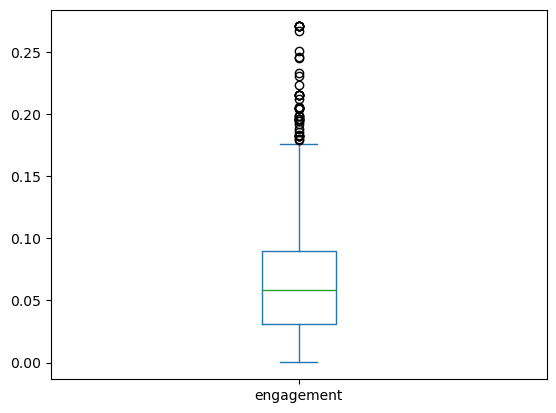

In [228]:
df.engagement.plot.box()

<AxesSubplot:>

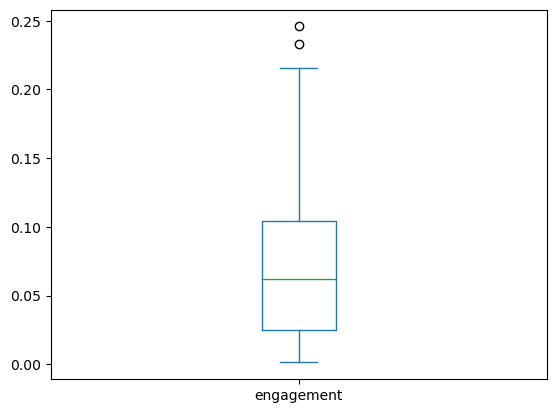

In [229]:
df[df.top_25 == 1].engagement.plot.box()

<AxesSubplot:>

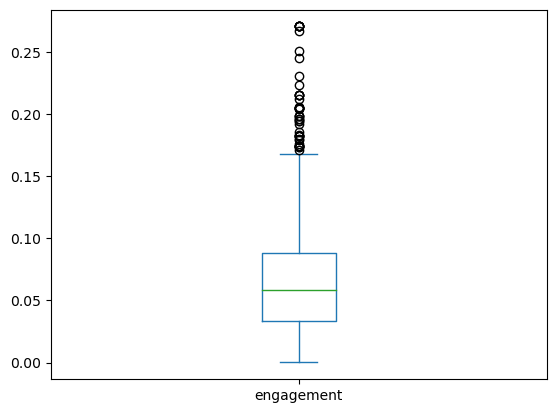

In [230]:
df[df.top_25 != 1].engagement.plot.box()

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 199
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       1229 non-null   object             
 1   title          1229 non-null   object             
 2   publishedAt    1229 non-null   datetime64[ns, UTC]
 3   channelTitle   1229 non-null   object             
 4   categoryId     1229 non-null   object             
 5   trending_date  1229 non-null   datetime64[ns, UTC]
 6   tags           1229 non-null   object             
 7   view_count     1229 non-null   object             
 8   likes          1229 non-null   object             
 9   comment_count  1229 non-null   object             
 10  description    1229 non-null   object             
 11  duration       1229 non-null   int64              
 12  captions       1229 non-null   object             
 13  rank           1229 non-null   int64             

## Takeaways
* engagement higher with top 25 videos

In [238]:
df.engagement = df.engagement.astype(float)

In [240]:
df.engagement

0      0.020040
1      0.057231
2      0.166547
3      0.001366
4      0.072784
         ...   
195    0.089409
196    0.117895
197    0.067428
198    0.064092
199    0.027896
Name: engagement, Length: 1229, dtype: float64

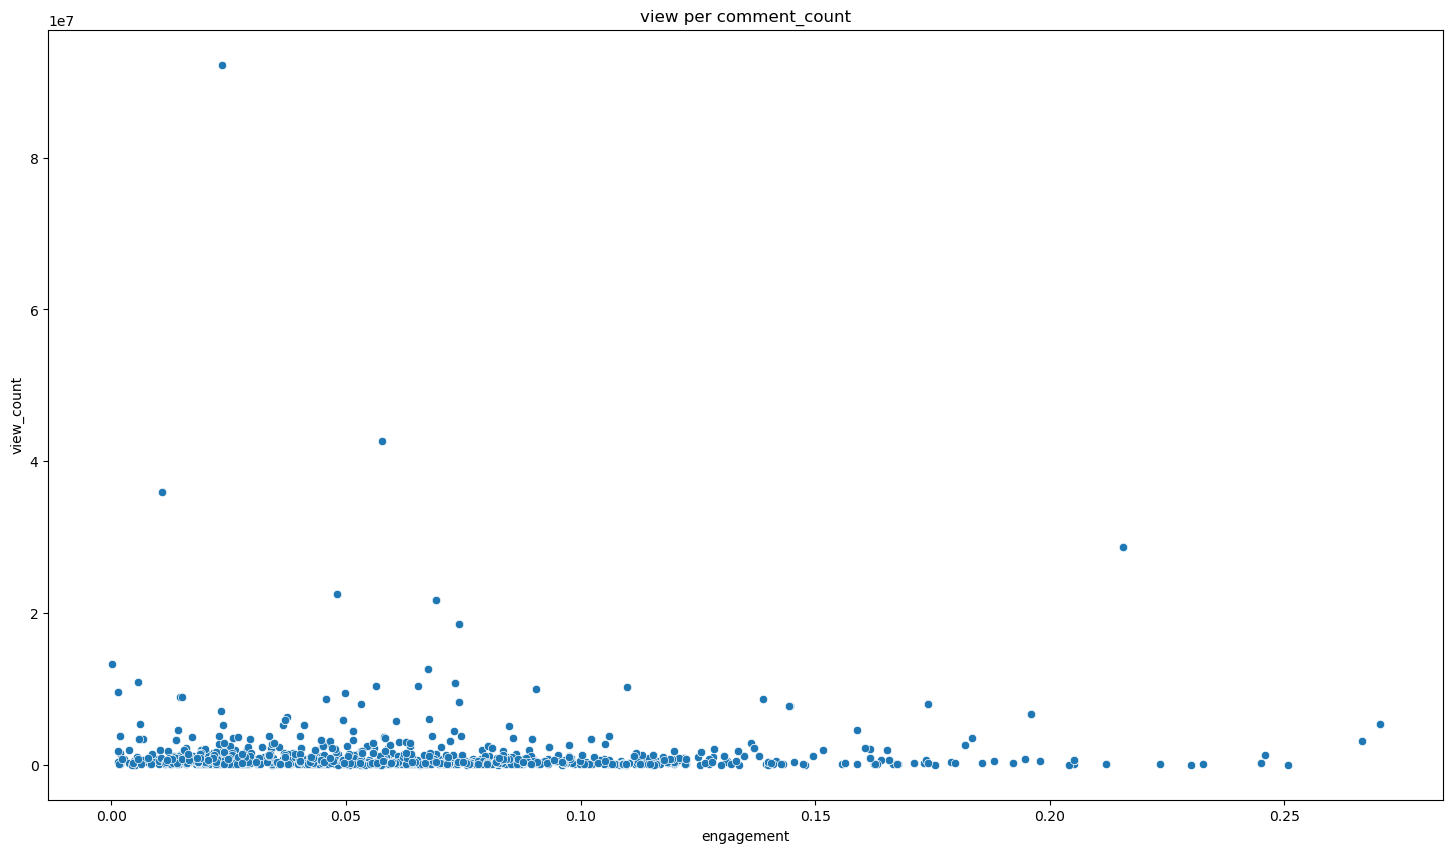

In [248]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.scatterplot(data=df,x='engagement',y='view_count')
plt.title('view per comment_count')
plt.show()

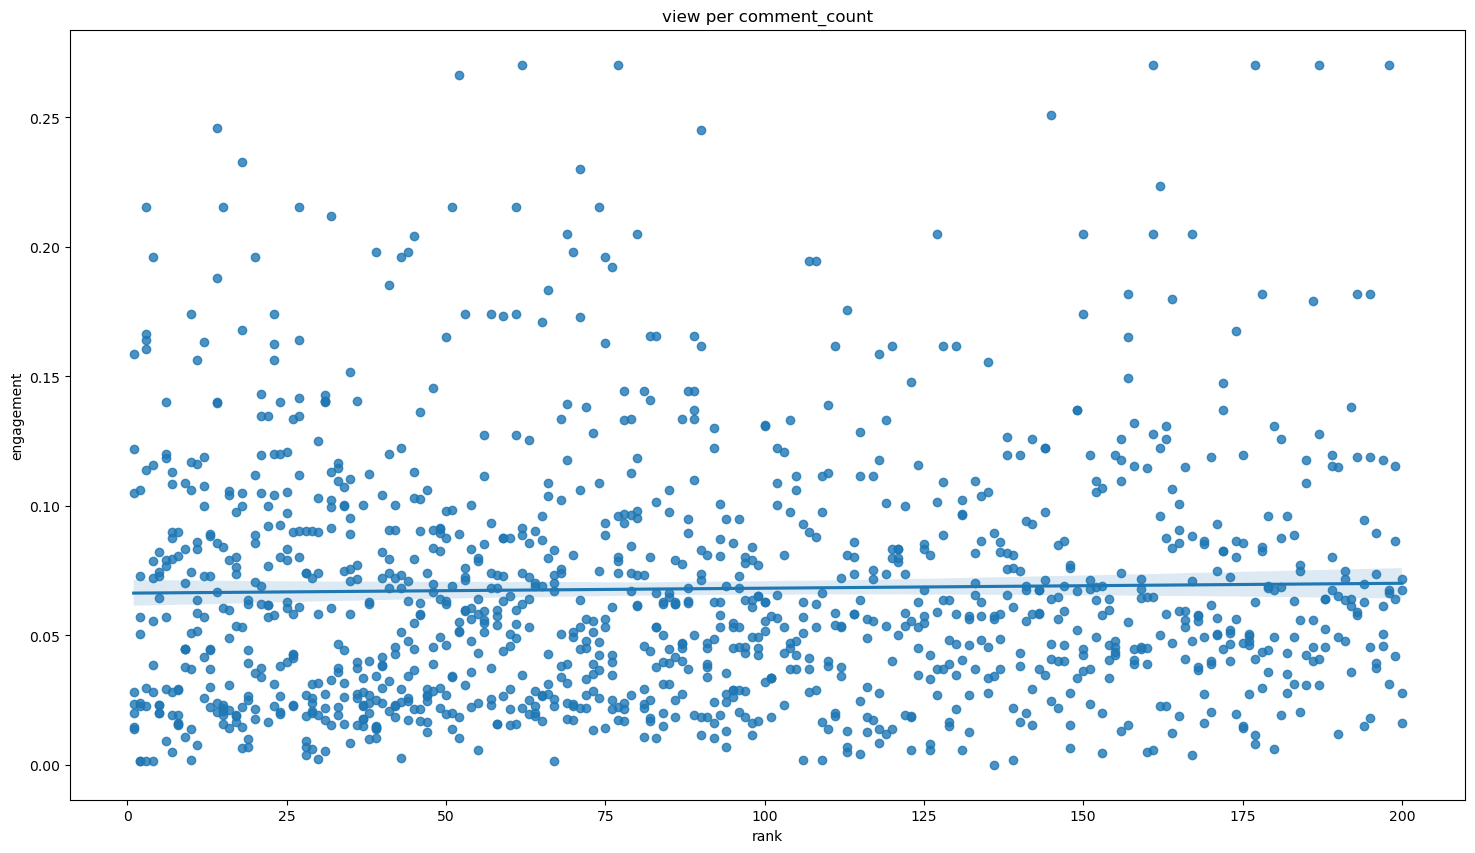

In [245]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df,x='rank',y='engagement')
plt.title('view per comment_count')
plt.show()

TypeError: The DTypes <class 'numpy.dtype[timedelta64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

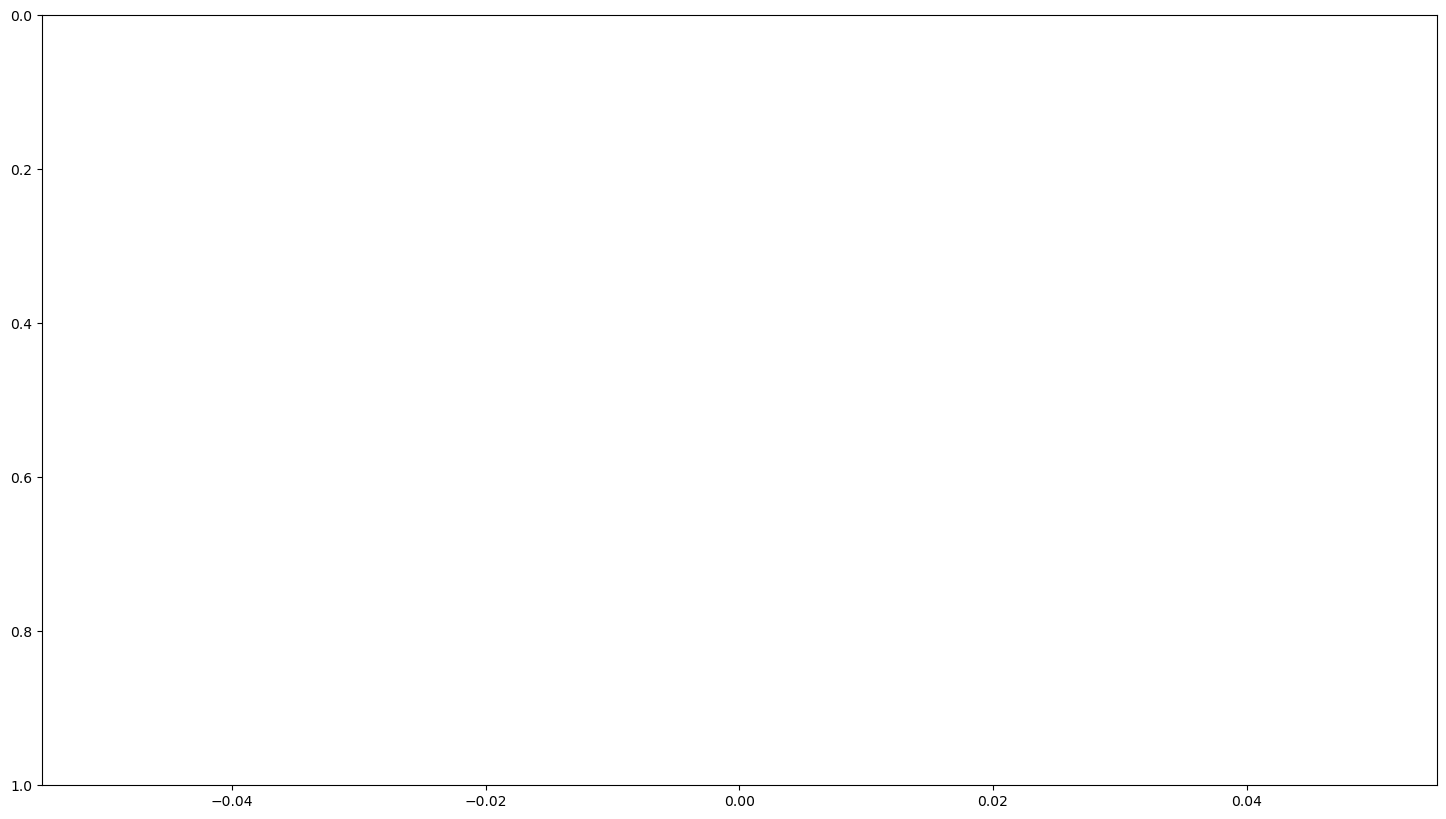

In [251]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.scatterplot(data=df,x='engagement',y='age')
plt.title('view per comment_count')
plt.show()

<AxesSubplot:ylabel='Frequency'>

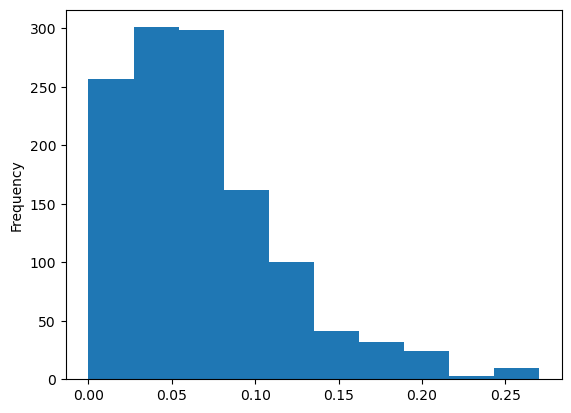

In [249]:
df.engagement.plot.hist()

<AxesSubplot:ylabel='Frequency'>

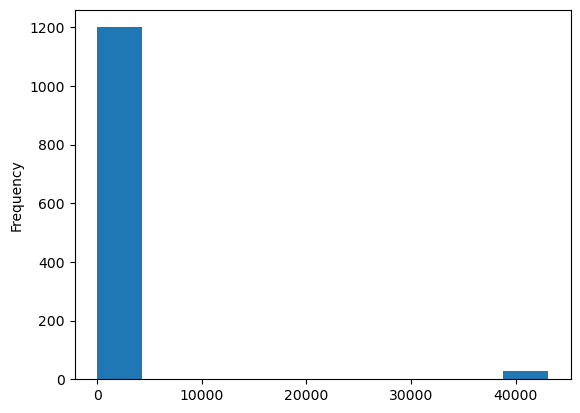

In [250]:
df.duration.plot.hist()